<a href="https://colab.research.google.com/github/SarahSaeedKhan/Tasks/blob/main/Simple_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from sklearn import metrics
import cv2
from numpy.random import seed
# from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import img_to_array

In [ ]:
seed(0)
tf.random.set_seed(0)
keras.backend.clear_session()
SIZE = 128

In [ ]:
data=[]
path1 = 'C:/Users/Qasim Khan/Desktop/FYP/AE Dataset/healthy/healthy'
files=os.listdir(path1)
for i in tqdm(files):
    img=cv2.imread(path1+'/'+i,0)   #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    data.append(img_to_array(img))

100%|████████████████████████████████████████████████████████████████████████████| 1431/1431 [00:00<00:00, 2169.76it/s]


In [ ]:
u_data=[]
path2 = '/AE Dataset/unhealthy/unhealthy'
files=os.listdir(path2)
for i in tqdm(files):
    img=cv2.imread(path2+'/'+i,0)   #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    u_data.append(img_to_array(img))

100%|██████████████████████████████████████████████████████████████████████████████| 316/316 [00:00<00:00, 2107.05it/s]


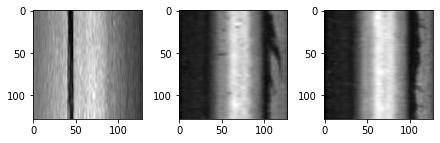

In [ ]:
plt.figure(figsize=(10, 2))
for i in range(1,4):
    ax = plt.subplot(1, 4, i)
    plt.imshow(data[i].reshape(SIZE, SIZE), cmap="gray")
plt.show()

In [ ]:
data = np.reshape(data, (len(data), SIZE, SIZE, 1))
data = data.astype('float32') / 255.
x_train, x_test = train_test_split(data,test_size = 0.05, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(1359, 128, 128, 1)
(72, 128, 128, 1)


In [ ]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(1359, 16384)
(72, 16384)


In [ ]:
#print(x_train)
print(tf.reduce_min(x_train))

tf.Tensor(0.0, shape=(), dtype=float32)


In [ ]:
inputs = tf.keras.Input(shape=(128*128,))
#norm = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
encode = tf.keras.layers.Dense(128, activation='relu', name='encode-1')(inputs)
encode = tf.keras.layers.Dense(14, activation='relu', name='encode-2')(encode)
coded =  tf.keras.layers.Dense(3, activation='relu', name='coded')(encode)
decode = tf.keras.layers.Dense(14, activation='relu', name='decode-1')(coded)
decode = tf.keras.layers.Dense(128, activation='relu', name='decode-2')(decode)
decoded =tf.keras.layers.Dense(128*128, activation='sigmoid', name='decoded')(decode)

In [ ]:
autoencoder = keras.Model(inputs=inputs,outputs=decoded)

In [ ]:
print(autoencoder.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16384)]           0         
_________________________________________________________________
encode-1 (Dense)             (None, 128)               2097280   
_________________________________________________________________
encode-2 (Dense)             (None, 14)                1806      
_________________________________________________________________
coded (Dense)                (None, 3)                 45        
_________________________________________________________________
decode-1 (Dense)             (None, 14)                56        
_________________________________________________________________
decode-2 (Dense)             (None, 128)               1920      
_________________________________________________________________
decoded (Dense)              (None, 16384)            

In [ ]:
def variation_percentage(y_pred,y_true):
    deviation = tf.math.subtract(y_pred , y_true)
    scaled_deviance = tf.math.divide(deviation,y_true) # element-wise divide
    percent_deviance = tf.math.abs(scaled_deviance) * 100
    return tf.keras.backend.mean(percent_deviance) # returns mean percent of deviance from original value

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
autoencoder.compile(optimizer=opt,
                  loss='mse')

In [ ]:
history = autoencoder.fit(x=x_train,y=x_train,
                epochs=50, batch_size=8,
                shuffle=True, verbose = 2,
                validation_data=(x_test, x_test) )

Epoch 1/50
170/170 - 4s - loss: 0.0482 - val_loss: 0.0402
Epoch 2/50
170/170 - 4s - loss: 0.0320 - val_loss: 0.0268
Epoch 3/50
170/170 - 4s - loss: 0.0243 - val_loss: 0.0194
Epoch 4/50
170/170 - 4s - loss: 0.0169 - val_loss: 0.0160
Epoch 5/50
170/170 - 4s - loss: 0.0137 - val_loss: 0.0141
Epoch 6/50
170/170 - 4s - loss: 0.0127 - val_loss: 0.0135
Epoch 7/50
170/170 - 4s - loss: 0.0121 - val_loss: 0.0130
Epoch 8/50
170/170 - 4s - loss: 0.0118 - val_loss: 0.0126
Epoch 9/50
170/170 - 4s - loss: 0.0113 - val_loss: 0.0120
Epoch 10/50
170/170 - 5s - loss: 0.0113 - val_loss: 0.0120
Epoch 11/50
170/170 - 4s - loss: 0.0115 - val_loss: 0.0118
Epoch 12/50
170/170 - 4s - loss: 0.0109 - val_loss: 0.0114
Epoch 13/50
170/170 - 4s - loss: 0.0108 - val_loss: 0.0115
Epoch 14/50
170/170 - 4s - loss: 0.0108 - val_loss: 0.0109
Epoch 15/50
170/170 - 4s - loss: 0.0103 - val_loss: 0.0108
Epoch 16/50
170/170 - 4s - loss: 0.0104 - val_loss: 0.0104
Epoch 17/50
170/170 - 4s - loss: 0.0101 - val_loss: 0.0112
Epoch 

In [ ]:
test_imgs = autoencoder.predict(x_test)
train_imgs = autoencoder.predict(x_train)

In [ ]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

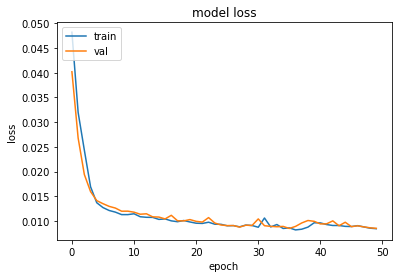

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

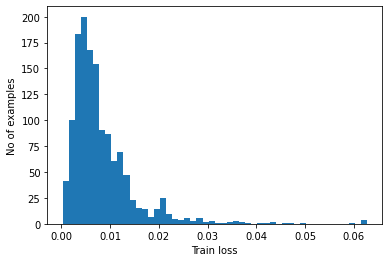

Threshold:  0.015391618


In [ ]:
reconstructions = autoencoder.predict(x_train)
train_loss = tf.keras.losses.mse(reconstructions, x_train)
plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

In [ ]:
print(threshold)

0.015391618


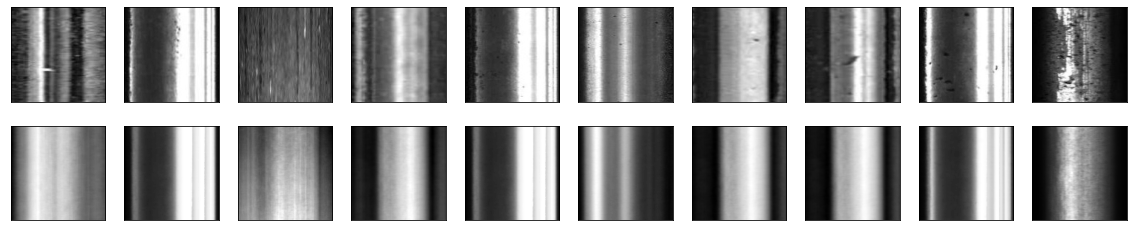

In [ ]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(128, 128),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_imgs[i].reshape(128, 128),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

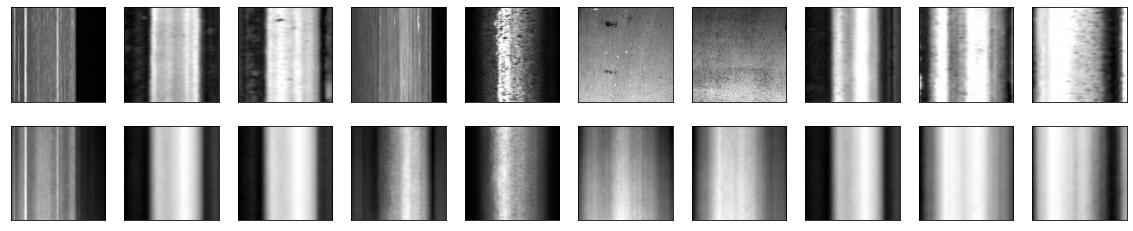

In [ ]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(128, 128),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(train_imgs[i].reshape(128, 128),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

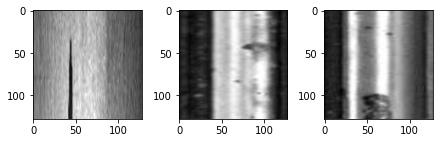

In [ ]:
plt.figure(figsize=(10, 2))
for i in range(1,4):
    ax = plt.subplot(1, 4, i)
    plt.imshow(u_data[i].reshape(SIZE, SIZE), cmap="gray")
plt.show()

In [ ]:
u_data = np.reshape(u_data, (len(u_data), SIZE, SIZE, 1))
u_data = u_data.astype('float32') / 255.
u_data = u_data.reshape((len(u_data), np.prod(u_data.shape[1:])))
print(u_data.shape)

(316, 16384)


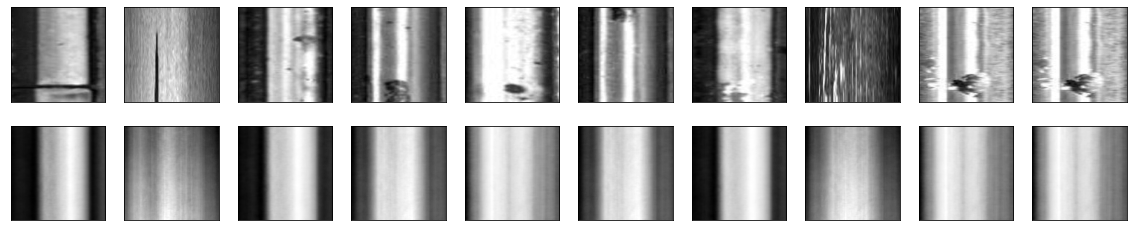

In [ ]:
u_pred = autoencoder.predict(u_data)
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(u_data[i].reshape(128, 128),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(u_pred[i].reshape(128, 128),cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
recons_defective = autoencoder.predict(u_data)
loss_defective = tf.keras.losses.mse(recons_defective, u_data)
count = 0
for i in range(315):
    if(loss_defective[i] > threshold):
       # plt.imshow(x_test[i].reshape(128, 128),cmap='gray')
        #plt.show()
        count = count +1
print("Defective images out of 316: " + str(count+1))

Defective images out of 316: 78


In [ ]:
print(type(loss_defective.numpy()))

<class 'numpy.ndarray'>
